                                                
                                                          Data Science
                                          Assignment 2: Statistical Testing and A/B Testing

 We first import the basic libraries as taught in class for data analysis and visualization tasks to our Jupiter Notebook, including NumPy for numerical operations, Pandas for data manipulation, Matplotlib for plotting, Seaborn for enhanced visualizations, and SciPy Stats for statistical analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Extract the experiment data set from your local file on the computer or extract it from your GitHub account.

In [3]:
df = pd.read_csv('/Users/pratiksha/Downloads/Data Files/experiment_dataset.csv')

Print the DataFrame taking df as an alias for further coding around the dataset.

In [4]:
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


The below code is used to display concise information about the DataFrame providing an overview of the DataFrame's structure and content. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


The below code provides summary statistics for all columns in the DataFrame, including numerical and categorical variables.

In [6]:
df.describe(include = 'all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


The below code displays the data types of each column in the DataFrame.

In [7]:
df.dtypes

Unnamed: 0      int64
Age             int64
Location       object
Device         object
Variant        object
Time Spent    float64
CTR           float64
dtype: object

The below code displays the last 10 rows of the DataFrame, providing a glimpse of the data towards the end.

In [8]:
df.tail(10)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
990,990,54,Location3,Device1,Control,19.357402,0.100896
991,991,35,Location3,Device1,Variant B,22.409808,0.100951
992,992,44,Location1,Device2,Variant A,20.161483,0.098470
993,993,24,Location3,Device3,Variant A,27.390527,0.095718
994,994,52,Location1,Device2,Control,15.012350,0.071914
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423
999,999,55,Location1,Device1,Variant B,25.803169,0.166688


The below code displays the first 10 rows of the DataFrame, showing an initial preview of the data.

In [9]:
df.head(10)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


The below code will create subplots to visualize the distributions and frequencies of various columns in the dataset. It plots histograms for numerical columns (Age, Time Spent, CTR) and bar plots for categorical columns (Location, Device, Variant) adjusting the layout of the subplots, and displaying the resulting plots.

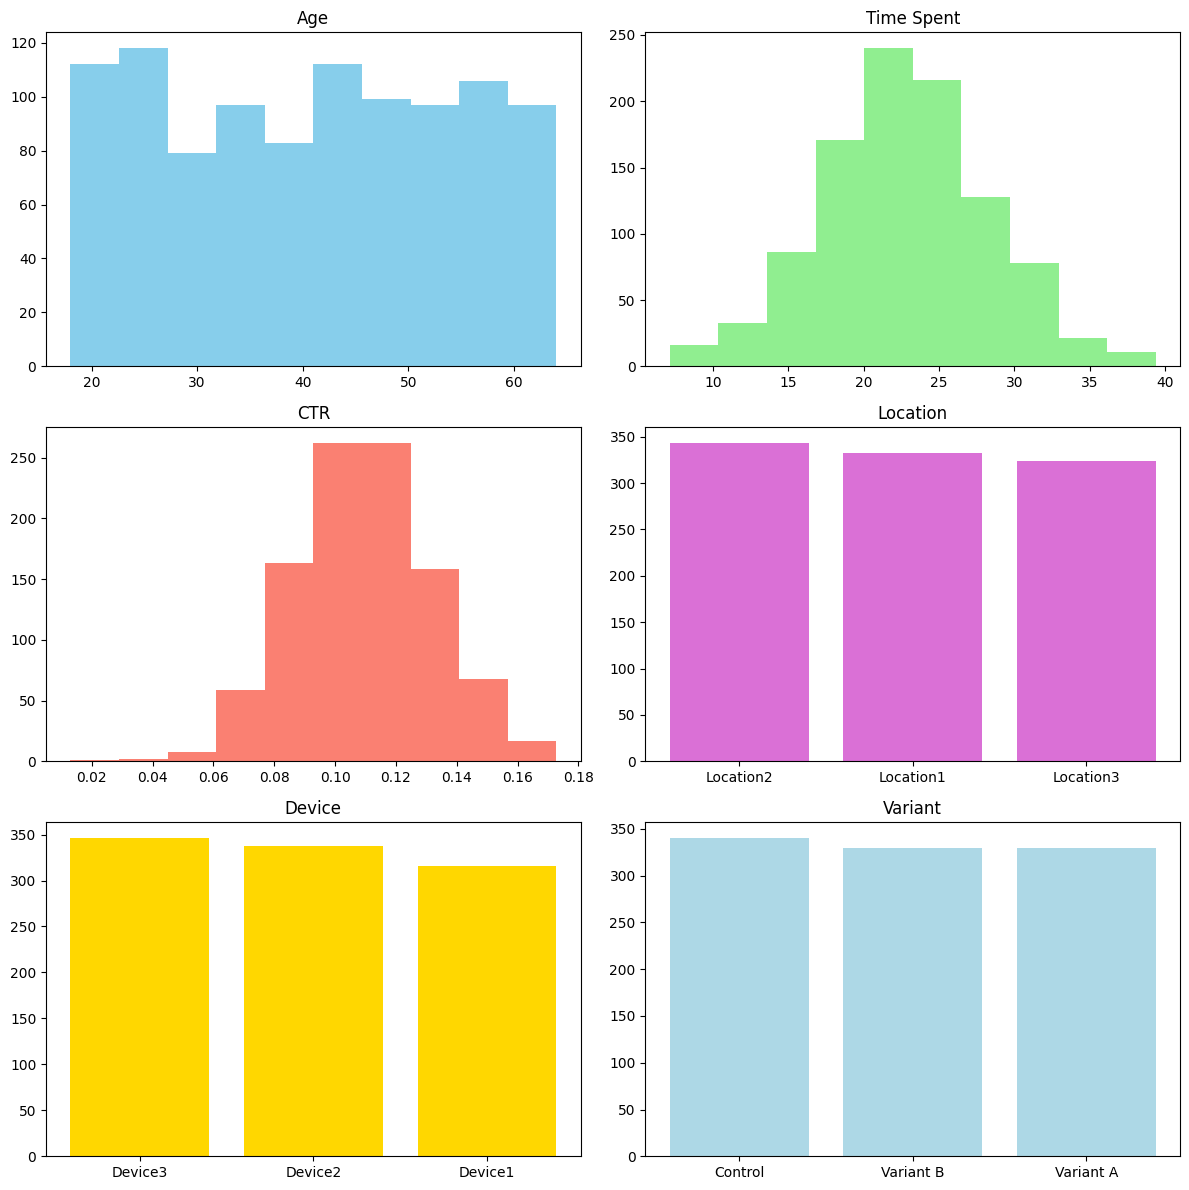

In [10]:
# Extract the columns from the data
age = df['Age']
location = df['Location']
device = df['Device']
variant = df['Variant']
time_spent = df['Time Spent']
ctr = df['CTR']

# Create subplots for each column
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot histograms for numerical columns (Age, Time Spent, CTR)
axs[0, 0].hist(age, bins=10, color='skyblue')
axs[0, 0].set_title('Age')

axs[0, 1].hist(time_spent, bins=10, color='lightgreen')
axs[0, 1].set_title('Time Spent')

axs[1, 0].hist(ctr, bins=10, color='salmon')
axs[1, 0].set_title('CTR')

# Plot bar plots for categorical columns (Location, Device, Variant)
axs[1, 1].bar(location.value_counts().index, location.value_counts().values, color='orchid')
axs[1, 1].set_title('Location')

axs[2, 0].bar(device.value_counts().index, device.value_counts().values, color='gold')
axs[2, 0].set_title('Device')

axs[2, 1].bar(variant.value_counts().index, variant.value_counts().values, color='lightblue')
axs[2, 1].set_title('Variant')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

After visualizing the graphs, the histograms for numerical columns show a roughly equal distribution across the bins without any significant peaks or valleys, and the bar plots for categorical columns exhibit relatively uniform bar heights with no outliers or extreme values, it can be concluded that the data is uniformly distributed and free from outliers. Thus, we are not required to do any data cleaning and will get to the statistical analysis of the date. 

Now I have computed the mean values of the 'Time Spent' and 'CTR' columns, grouped by different categories in the DataFrame. The below code calculates the average 'Time Spent' and 'CTR' values for each unique 'Location' in the DataFrame.

In [11]:
df.groupby('Location')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


The below code calculates the average 'Time Spent' and 'CTR' values for each unique 'Device' in the DataFrame.

In [12]:
df.groupby('Device')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


The below code calculates the average 'Time Spent' and 'CTR' values for each unique 'Age' in the DataFrame.

In [13]:
df.groupby('Age')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Age,,
18,21.805160,0.104431
19,24.301099,0.113928
20,22.658484,0.106769
21,23.174444,0.106317
22,23.339777,0.111566
23,21.203465,0.111024
24,21.505956,0.109765
25,23.541231,0.109907
26,22.598906,0.110061


The below code  calculates the average 'Time Spent' and 'CTR' values for each unique 'Variant' in the DataFrame.

In [14]:
df.groupby('Variant')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Variant,,
Control,20.070781,0.098554
Variant A,24.805547,0.120269
Variant B,23.343783,0.108933


The groupby function gave me insights into the average 'Time Spent' and 'CTR' values associated with different categories or groups within the DataFrame, allowing for comparisons and analysis based on those categories. It can be seen that average time spent and average CTR is almost similar across locations, devices and roughly around age.

The below code will categorizes the 'Age' column into different age ranges defined by the age_ranges list. It then calculates the average 'CTR' and 'Time Spent' values for each age group. The results are displayed as a grouped DataFrame showing the mean 'CTR' and 'Time Spent' values for each age group. This allows for a comparison of engagement metrics across different age ranges in the dataset.

In [15]:

age_ranges = [
    (18, 24),
    (25, 34),
    (35, 44),
   
]
max_end = df['Age'].max() 
df['age_group'] = pd.cut(df['Age'], bins=[start for start, _ in age_ranges] + [max_end], right=False)
grouped_data = df.groupby('age_group').agg({'CTR': 'mean', 'Time Spent': 'mean'})
print(grouped_data)

                CTR  Time Spent
age_group                      
[18, 25)   0.108860   22.473389
[25, 35)   0.107459   22.885105
[35, 64)   0.109895   22.700820


We can observe the average engagement metrics (CTR and Time Spent) for different age groups. he average CTR (the proportion of clicks per impression), which ranges between roughly 10.7% and 10.9%, can be shown from the findings to be quite stable across the age groups. 

The below code will create a box plot using the seaborn library. It will visualize the distribution of the 'Time Spent' variable for each unique value of the 'Variant' variable in the DataFrame providing a summary of the distribution and potential differences in 'Time Spent' across different 'Variant' groups.

<Axes: xlabel='Variant', ylabel='Time Spent'>

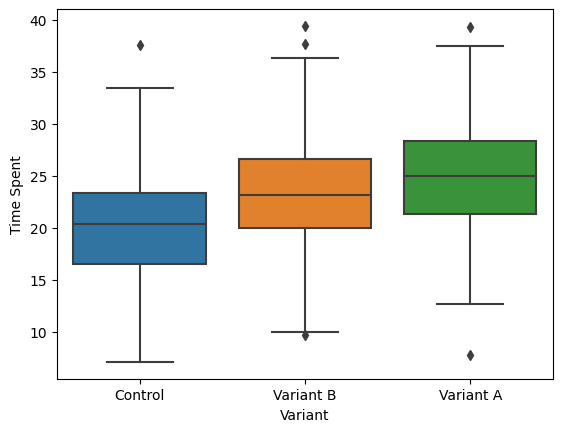

In [16]:
sns.boxplot(data= df, x= 'Variant', y= 'Time Spent')

The below code will generate a box plot using the seaborn library. It will visually represent the distribution of the 'CTR' (Click-through Rate) variable for each unique value of the 'Variant' variable in the DataFrame, allowing for an overview of the 'CTR' distribution across different 'Variant' groups.

<Axes: xlabel='Variant', ylabel='CTR'>

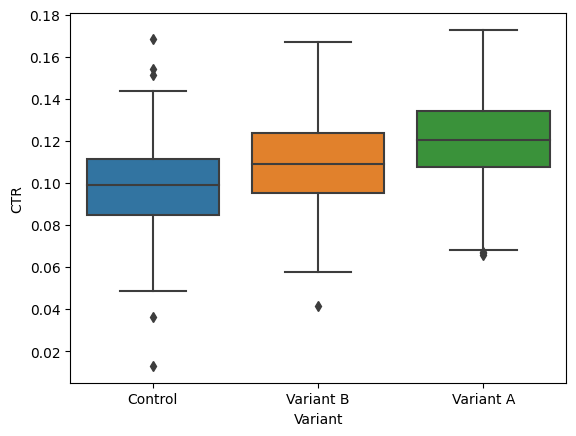

In [17]:
sns.boxplot(data= df, x= 'Variant', y= 'CTR')

The above box plots show that the mean CTR of Variant A is higher than the mean CTR of Variant B and Control. Also, the mean Time Spent of Variant A is higher than the mean Time Spent of Variant B and Control. This is my visual analysis of the engagement metrics.

The below code compares the 'Time Spent' variable among three different groups: 'Variant A', 'Variant B', and 'Control'. It creates three separate variables (var_a, var_b, var_c) that contain the 'Time Spent' values for each group. Then, it performs a one-way analysis of variance (ANOVA) test to assess if there are any significant differences in the means of the 'Time Spent' variable between the groups. The resulting p_val represents the p-value, which indicates the significance level of the test. 

In [18]:
var_a = df[df['Variant'] == 'Variant A']['Time Spent']
var_b = df[df['Variant'] == 'Variant B']['Time Spent']
var_c = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.f_oneway(var_a, var_b, var_c)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


The result of the ANOVA test indicates that there are significant differences in the 'Time Spent' variable among the groups ('Variant A', 'Variant B', and 'Control'). The statistic value indicates the calculated F-statistic, which measures the variation between group means compared to the variation within each group. The extremely low p-value suggests strong evidence to reject the null hypothesis, indicating that the differences in the means of the 'Time Spent' variable among the groups are highly significant.

In the below code, we similarly compare the 'CTR' (Click-through Rate) variable among the three different groups and perfrom the ANOVA test.

In [19]:
var_a = df[df['Variant'] == 'Variant A']['CTR']
var_b = df[df['Variant'] == 'Variant B']['CTR']
var_c = df[df['Variant'] == 'Control']['CTR']

p_val = stats.f_oneway(var_a, var_b, var_c)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


The result of the ANOVA test indicates that there are statistically significant differences in the 'CTR' values among the 'Variant A', 'Variant B', and 'Control' groups.

__________________________________________________________________________________________________________________________________________________

#### 1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

The below code calculates the lift in CTR (Click-through Rate) for 'Variant A' and 'Variant B' compared to the 'Control' group. It groups the DataFrame by the 'Variant' column and sums the 'CTR' values for each group. The variable lift_variant_a represents the difference in CTR between 'Variant A' and 'Control', while lift_variant_b represents the difference in CTR between 'Variant B' and 'Control'. The code then prints the calculated lift values, indicating the improvement or decline in CTR compared to the 'Control' group for each variant.

In [20]:
df2 = df.groupby(by = 'Variant')['CTR'].sum()
lift_variant_a = df2['Variant A'] - df2['Control']
lift_variant_b = df2['Variant B'] - df2['Control']
print('Variant A Lift in CTR:', lift_variant_a)
print('Variant B Lift in CTR:', lift_variant_b)

Variant A Lift in CTR: 6.180520716900553
Variant B Lift in CTR: 2.439491210528942


The result indicates the lift in CTR (Click-through Rate) for 'Variant A' and 'Variant B' compared to the 'Control' group.

Variant A: The lift in CTR is 6.180520716900553, suggesting that 'Variant A' has a 6.18% higher CTR compared to the 'Control' group. This indicates that the implementation of 'Variant A' has resulted in a positive impact on user engagement, as it has generated a higher click-through rate.

Variant B: The lift in CTR is 2.439491210528942, indicating that 'Variant B' has a 2.44% higher CTR compared to the 'Control' group. This implies that 'Variant B' has also shown improvement in user engagement, albeit to a lesser extent than 'Variant A'.

Both 'Variant A' and 'Variant B' have demonstrated lifts in CTR compared to the 'Control' group, with 'Variant A' showing a higher improvement. 




The below code calculates the lift in Time Spent for 'Variant A' and 'Variant B' compared to the 'Control' group. It groups the DataFrame by the 'Variant' column and sums the 'Time Spent' values for each group. The variable varA represents the difference in Time Spent between 'Variant A' and 'Control', while varB represents the difference in Time Spent between 'Variant B' and 'Control'. The code then prints the calculated lift values, indicating the increase or decrease in Time Spent compared to the 'Control' group for each variant.

In [21]:
df2 = df.groupby(by = 'Variant')['Time Spent'].sum()
varA = df2['Variant A'] - df2['Control']
varB = df2['Variant B'] - df2['Control']
print('Variant A Lift in Time Spent:', varA)
print('Variant B Lift in Time Spent:', varB)

Variant A Lift in Time Spent: 1361.7650937699673
Variant B Lift in Time Spent: 879.3828393472804



The result indicates the lift in Time Spent for 'Variant A' and 'Variant B' compared to the 'Control' group.

Variant A: The lift in Time Spent is 1361.7650937699673 units, suggesting that 'Variant A' has a total Time Spent that is 1361.77 units higher than the 'Control' group. This indicates that 'Variant A' has been successful in capturing more user attention and engagement, resulting in a significant increase in the total time spent on the content.

Variant B: The lift in Time Spent is 879.3828393472804 units, indicating that 'Variant B' has a total Time Spent that is 879.38 units higher than the 'Control' group. This implies that 'Variant B' has also shown improvement in capturing user attention and increasing the total time spent on the content, although to a lesser extent than 'Variant A'.

Both 'Variant A' and 'Variant B' have demonstrated lifts in Time Spent compared to the 'Control' group, with 'Variant A' showing a higher improvement. These lift values provide insights into the relative effectiveness of different variants in terms of increasing user engagement and the total time users spend on the content.

Overall, Variant A is more successful in capturing and retaining user attention, resulting in users spending more time engaging with the content or feature being tested.  There is a weak positive correlation between the control and the variants, signifying that on average, when it's a variant, the user tends to spend more time and click more often.

__________________________________________________________________________________________________________________________________________________

#### 2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

To determine how significant the gains are, I'd like to analyse the variants separately from one another and do t-test and p-value tests. We begin by supposing that there is no discernible difference between the control group and the variations in terms of the click-through rate (CTR) or average time spent. The null hypothesis is what is meant by this assertion.

The null hypothesis thus implies that:

1. For the click-through rate (CTR): 1. There are no significant differences in the click-through rates (CTR) between the control group and each feature variant. To put it another way, any differences we observe in the CTR may just be the result of chance and not the particular features being examined.
For the average time spent: The average amount of time spent by the control group and each feature variant is not significantly different. Because of this, any differences in the amount of time spent may just be random fluctuations unrelated to the features being evaluated.


2. We employ statistical instruments, such as the t-test, to test these hypotheses. We can tell if there is a significant difference between each feature variant and the control group in terms of CTR and average time spent using the t-test. We may determine the size of the differences between the group averages by computing the t-value using the t-test.


We also take a look at the p-value, which indicates the likelihood that the data we have would be obtained if the null hypothesis were true. The estimated p-value indicates that the observed differences in CTR or average time spent are unlikely to have happened by chance alone if it is less than a predetermined threshold (typically 0.05). So, we reject the null hypothesis and come to the conclusion that there is in fact a significant difference between the groups in terms of CTR or average time spent.

The below code separates the original DataFrame into three separate DataFrames based on the 'Variant' column: 'df_varB' contains rows where the 'Variant' is 'Variant B', 'df_varA' contains rows where the 'Variant' is 'Variant A', and 'df_Control' contains rows where the 'Variant' is 'Control'. Each resulting DataFrame will only include the rows corresponding to the specific variant mentioned in its name. This separation allows for further analysis and comparison of data specific to each variant required for the statistical testing.

In [22]:
df_varB = df[df['Variant'] == 'Variant B']
df_varA = df[df['Variant'] == 'Variant A']
df_Control = df[df['Variant'] == 'Control']

The bellow code performs independent two-sample t-tests to compare the 'Time Spent' variable between the 'Control' group and each variant group ('Variant B' and 'Variant A') and calculates the t-statistic and p-value for each comparison.

Variant B: The first line of code performs a t-test between the 'Time Spent' values of the 'Control' group and 'Variant B'. The resulting output will include the t-statistic and p-value, which can be used to determine if there is a statistically significant difference in the 'Time Spent' between the two groups.

Variant A: The second line of code performs a t-test between the 'Time Spent' values of the 'Control' group and 'Variant A'. Similarly, the output will include the t-statistic and p-value for this comparison.

These t-tests help assess whether there are significant differences in the average 'Time Spent' between the 'Control' group and each variant group, providing insights into the impact of different variants on user engagement.

In [23]:
print("Variant B:", stats.ttest_ind(df_Control['Time Spent'], df_varB['Time Spent']))
print("Variant A:", stats.ttest_ind(df_Control['Time Spent'], df_varA['Time Spent']))

Variant B: Ttest_indResult(statistic=-8.174237395991806, pvalue=1.496358076285182e-15)
Variant A: Ttest_indResult(statistic=-12.142363487472364, pvalue=8.488565644996449e-31)


The result of the t-tests conclude that both 'Variant B' and 'Variant A' show statistically significant differences in 'Time Spent' compared to the 'Control' group. However, the negative t-statistics and lower 'Time Spent' in both variants suggest that the changes made in these variants may have resulted in reduced user engagement or interaction with the content.

I performed a similar independent two-sample t-test code to compare the 'CTR' (Click-through Rate) variable between the 'Control' group and each variant group.

Variant B: The resulting output will include the t-statistic and p-value, which can be used to determine if there is a statistically significant difference in the 'CTR' between the two groups.

Variant A: The t-test between the 'CTR' values of the 'Control' group and 'Variant A' will also give a similar output.



In [24]:
print("Variant B:", stats.ttest_ind(df_Control['CTR'], df_varB['CTR']))
print("Variant A:", stats.ttest_ind(df_Control['CTR'], df_varA['CTR']))

Variant B: Ttest_indResult(statistic=-6.4718143491783255, pvalue=1.8743198199982106e-10)
Variant A: Ttest_indResult(statistic=-13.829424737499187, pvalue=1.9602781373243157e-38)


The result of the t-tests provides information about the statistical significance of the difference in 'CTR' (Click-through Rate) between the 'Control' group and each variant group. Both 'Variant B' and 'Variant A' show statistically significant differences in 'CTR' compared to the 'Control' group. The negative t-statistics and lower 'CTR' in both variants suggest that the changes made in these variants may have resulted in a reduced click-through rate or less engagement with the content from users.

Each line of the below code filters the original DataFrame to select only the rows where the 'Variant' column matches the specified variant ('Variant A' or 'Variant B'). The selected rows are then assigned to the corresponding DataFrame variable, allowing for separate analysis or comparison of the 'Time Spent' and 'CTR' values between the two variants.

In [25]:

variantA_time_spent = df[df['Variant'] == 'Variant A']['Time Spent']
variantB_time_spent = df[df['Variant'] == 'Variant B']['Time Spent']
variantA_CTR = df[df['Variant'] == 'Variant A']['CTR']
variantB_CTR = df[df['Variant'] == 'Variant B']['CTR']


The code below performs independent two-sample t-tests to compare the 'Time Spent' and 'CTR' (Click-through Rate) variables between 'Variant A' and 'Variant B' groups.

For 'Time Spent': The first t-test calculates the t-statistic and p-value by comparing the 'Time Spent' values of 'Variant A' and 'Variant B'. The t-statistic measures the difference in means between the two groups, and the p-value indicates the statistical significance of that difference. The resulting t-statistic and p-value are then printed.

For 'CTR': The second t-test calculates the t-statistic and p-value by comparing the 'CTR' values of 'Variant A' and 'Variant B'. Similarly, the t-statistic represents the difference in means between the two groups, and the p-value reflects the statistical significance. The t-statistic and p-value are printed.

By conducting these t-tests, the code helps determine if there are significant differences in the 'Time Spent' and 'CTR' between 'Variant A' and 'Variant B'. The t-statistic indicates the direction and magnitude of the difference, while the p-value indicates the likelihood of observing such a difference by chance.

In [26]:
t_statistic, p_value = stats.ttest_ind(variantA_time_spent, variantB_time_spent)
print('Test between Variant A & B Time Spent')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t_statistic, p_value = stats.ttest_ind(variantA_CTR, variantB_CTR)
print('\n Test between Variant A & B CTR')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

Test between Variant A & B Time Spent
t-statistic: 3.6788175394209075
p-value: 0.0002534771014765265

 Test between Variant A & B CTR
t-statistic: 7.08499696316128
p-value: 3.587180487986577e-12



The t-tests between 'Variant A' and 'Variant B' reveal the following results:

For 'Time Spent': The t-statistic of 3.6788 indicates a significant difference in the means of 'Time Spent' between 'Variant A' and 'Variant B'. The positive value suggests that the mean 'Time Spent' in 'Variant B' is higher than in 'Variant A'. The corresponding p-value of 0.0002535 is below the typical threshold of 0.05, indicating strong evidence against the null hypothesis of no difference in means.

For 'CTR': The t-statistic of 7.085 indicates a significant difference in the means of 'CTR' between 'Variant A' and 'Variant B'. The positive value indicates that the mean 'CTR' in 'Variant B' is higher than in 'Variant A'. The p-value of 3.587e-12 is significantly below 0.05, providing strong evidence against the null hypothesis.



These results demonstrate that for both Time Spent and CTR, Variant A performs higher on average than Variant B, and both p-values are less than .05 indicating a statistical significant result, which is very likely to repeat with more samples. This means that it's very safe to say Variant A is the better of the two Variants when it comes to Time Spent and CTR as the performance benchmarks.

__________________________________________________________________________________________________________________________________________________

#### 3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy.



It is evident from the study that both Variants perform better in terms of click through rate (CTR) and time spent.

There has been improvement when examining the increase in Time Spent and Click through rate. For both Variants, there is a considerable increase in time spent compared to the control group. However, among the two Variants, Variant A does suffer a greater increase in time spent. Next, both Variants exhibit a significant increase when the click through rate is elevated.
The bigger of the two rises, however, is once again experienced by Variant A.

As we can see, the average time spent in the control is significantly less than that in Variant A and Variant B. The results are significant and very likely to reoccur for both since the p-value is incredibly low (much lower than 0.05). With the reduced T-Stat and p-value, we can also see that Variant A performs better than Variant B in this situation.

There is a clear significant difference between the variant and the control when comparing the t-test value and the p-value. We accept the null hypothesis that the variants would improve the Time Spent and Click Through Rate in both situations because the p-value is considerably below 0.05.

These findings show that Variant A outperforms Variant B on average for Time Spent and CTR. Both p-values are less than.05, indicating a statistically significant result that is very likely to hold true with further samples. As a result, it is extremely safe to state that Variant A outperforms Variant B in terms of Time Spent and CTR, the performance metrics.

I would advise the engineering team to deploy Variant A because, as was already said, it has the greatest effect on time and CT.  Both variants are a clear improvement over the current feature but Variant A would be the most impactful as it showed the highest average lift for both variables, and the likelyhood of this result reoccuring is statistically significant. 



__________________________________________________________________________________________________________________________________________________


#### 4. Create a roll-out plan. How quickly will you introduce the feature to your audience?



I advise releasing the feature as soon as feasible because it must already be created and capable of being used as it was during testing. Perhaps some time is needed to work out any glitches and make sure you have the ability to run it on all devices. Furthermore, because you are changing a crucial component, you should proceed cautiously because if it malfunctions, you will face even more serious problems. The best case scenario, however, would be to release this as soon as feasible given the substantial rise in Time Spent and CTR. This shift carries very little risk, and if there aren't many obstacles, it should be made as soon as feasible because the outcomes are quite positive.

Users of Variant B should be promptly switched to using Variant A, depending on the actual content of the Variants, to prevent them from growing too attached to using Variant B and being irritated at being forced to use Variant A. Once each of those users has switched to Variant A, Variant B can be abandoned. With the control group still in place, the business may keep an eye on Variant A's data with a larger user base to make sure there are no problems, and perhaps make any minor alterations or tweaks that could enhance Variant A before a complete launch. Reviewing the effects of any adjustments would be considerably simpler if the control group was already in place. 

Finally, the organisation should switch the control users over to Variant A if they are confident that the system can support the full number of users. Everything should be completed as quickly as is safe. We already know that Variant A's performance boost in terms of Time Spent and CTR is so high and large that there is very little danger that this improvement won't continue when more people start utilising it, assuming the load on Variant A creates no problems. Therefore, the shift can happen as quickly as the Variant A system can handle.

The company can successfully manage the switch from Variant B to Variant A by taking these actions. Variant A has demonstrated good performance and statistical significance, suggesting that it is a promising candidate for continued deployment. The transition should be executed effectively, taking into account customer happiness and the system's overall stability.



__________________________________________________________________________________________________________________________________________________